In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/heart-attack-risk-and-prediction-dataset-in-india/heart_attack_prediction_india.csv


# Load Dataset

In [19]:
df = pd.read_csv('/kaggle/input/heart-attack-risk-and-prediction-dataset-in-india/heart_attack_prediction_india.csv')

In [20]:
df.head()

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,...,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,109,0,0,9,0,0,209,97987,0,1


In [21]:
df.shape

(10000, 26)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Patient_ID               10000 non-null  int64 
 1   State_Name               10000 non-null  object
 2   Age                      10000 non-null  int64 
 3   Gender                   10000 non-null  object
 4   Diabetes                 10000 non-null  int64 
 5   Hypertension             10000 non-null  int64 
 6   Obesity                  10000 non-null  int64 
 7   Smoking                  10000 non-null  int64 
 8   Alcohol_Consumption      10000 non-null  int64 
 9   Physical_Activity        10000 non-null  int64 
 10  Diet_Score               10000 non-null  int64 
 11  Cholesterol_Level        10000 non-null  int64 
 12  Triglyceride_Level       10000 non-null  int64 
 13  LDL_Level                10000 non-null  int64 
 14  HDL_Level                10000 non-null

In [23]:
df.describe()

,Patient_ID,Age,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,5000.50000,49.394900,0.092900,0.24690,0.303700,0.301400,0.352800,0.595800,5.021700,224.753000,...,89.312000,0.403600,0.311300,5.518800,0.311000,0.152500,206.383400,1.022062e+06,0.344700,0.300700
std,2886.89568,17.280301,0.290307,0.43123,0.459878,0.458889,0.477865,0.490761,3.156394,43.359172,...,17.396486,0.490644,0.463048,2.866264,0.462926,0.359523,112.391711,5.605978e+05,0.475294,0.458585
min,1.00000,20.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,...,60.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10.000000,5.035300e+04,0.000000,0.000000
25%,2500.75000,35.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,187.000000,...,74.000000,0.000000,0.000000,3.000000,0.000000,0.000000,110.000000,5.357838e+05,0.000000,0.000000
50%,5000.50000,49.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,5.000000,226.000000,...,89.000000,0.000000,0.000000,6.000000,0.000000,0.000000,206.000000,1.021383e+06,0.000000,0.000000
75%,7500.25000,64.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,8.000000,262.000000,...,104.000000,1.000000,1.000000,8.000000,1.000000,0.000000,304.000000,1.501670e+06,1.000000,1.000000
max,10000.00000,79.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,10.000000,299.000000,...,119.000000,1.000000,1.000000,10.000000,1.000000,1.000000,399.000000,1.999714e+06,1.000000,1.000000


# Data Preprocessing

In [24]:
df.isnull().sum()

Patient_ID                 0
State_Name                 0
Age                        0
Gender                     0
Diabetes                   0
Hypertension               0
Obesity                    0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity          0
Diet_Score                 0
Cholesterol_Level          0
Triglyceride_Level         0
LDL_Level                  0
HDL_Level                  0
Systolic_BP                0
Diastolic_BP               0
Air_Pollution_Exposure     0
Family_History             0
Stress_Level               0
Healthcare_Access          0
Heart_Attack_History       0
Emergency_Response_Time    0
Annual_Income              0
Health_Insurance           0
Heart_Attack_Risk          0
dtype: int64

In [25]:
len(df[df.duplicated()])

0

In [26]:
df = df.rename(columns= {
    'Patient_ID': 'id',
    'State_Name': 'state',
    'Alcohol_Consumption': 'alc',
    'Physical_Activity': 'phy',
    'Diet_Score': 'diet',
    'Cholesterol_Level': 'chol',
    'Triglyceride_Level': 'tgl',
    'LDL_Level': 'ldl',
    'HDL_Level': 'hdl',
    'Systolic_BP': 'sbp',
    'Diastolic_BP': 'dbp',
    'Air_Pollution_Exposure': 'air',
    'Family_History': 'fam',
    'Stress_Level': 'stress',
    'Healthcare_Access': 'hc_access',
    'Heart_Attack_History': 'ha_hist',
    'Emergency_Response_Time': 'ert',
    'Annual_Income': 'income',
    'Health_Insurance': 'insurance',
    'Heart_Attack_Risk': 'target',
    'Age': 'age',
    'Gender': 'gender',
    'Hypertension': 'hypertension',
    'Obesity': 'obesity',
    'Smoking': 'smoking',
    'Diabetes': 'diabetes'
})
df.head()

,id,state,age,gender,diabetes,hypertension,obesity,smoking,alc,phy,...,dbp,air,fam,stress,hc_access,ha_hist,ert,income,insurance,target
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,...,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,109,0,0,9,0,0,209,97987,0,1


In [27]:
df.columns

Index(['id', 'state', 'age', 'gender', 'diabetes', 'hypertension', 'obesity',
       'smoking', 'alc', 'phy', 'diet', 'chol', 'tgl', 'ldl', 'hdl', 'sbp',
       'dbp', 'air', 'fam', 'stress', 'hc_access', 'ha_hist', 'ert', 'income',
       'insurance', 'target'],
      dtype='object')

In [28]:
df.head()

,id,state,age,gender,diabetes,hypertension,obesity,smoking,alc,phy,...,dbp,air,fam,stress,hc_access,ha_hist,ert,income,insurance,target
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,...,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,109,0,0,9,0,0,209,97987,0,1


# Data Visualization

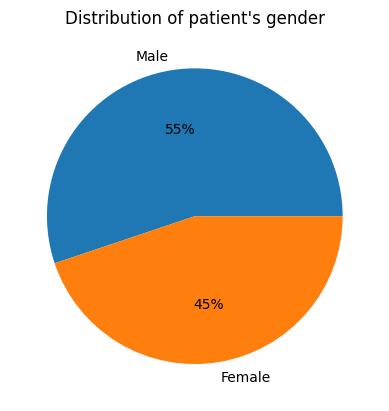

In [29]:
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%.0f%%')
plt.title("Distribution of patient's gender")
plt.show()

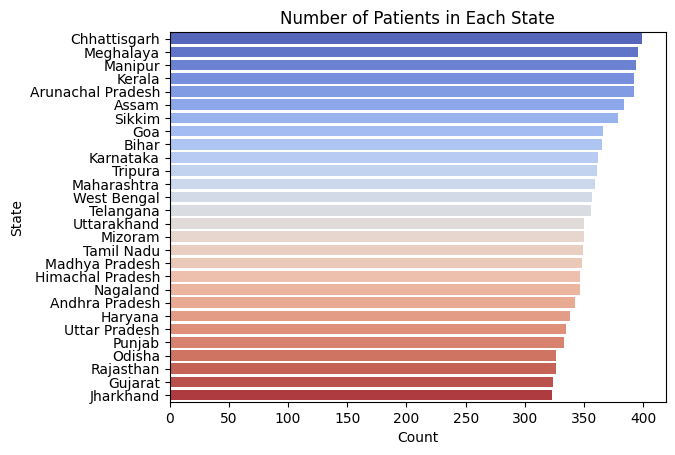

In [49]:
sn.countplot(data=df, y='state', order=df['state'].value_counts().index, palette="coolwarm")
plt.title('Number of Patients in Each State')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

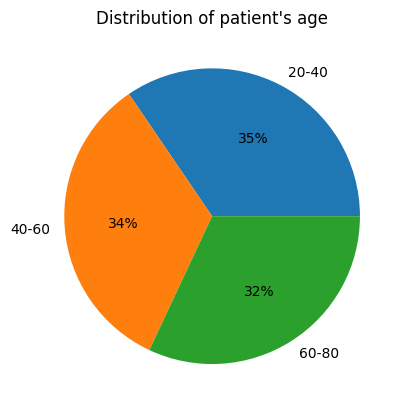

In [31]:
dff = df.copy()
dff['age_group'] = pd.cut(dff['age'], bins=[20, 40, 60, 80], labels=["20-40", "40-60", "60-80"])

age_counts = dff['age_group'].value_counts()
plt.pie(age_counts, labels=["20-40", "40-60", "60-80"], autopct='%.0f%%')
plt.title("Distribution of patient's age")
plt.show()

In [32]:
df.head()

,id,state,age,gender,diabetes,hypertension,obesity,smoking,alc,phy,...,dbp,air,fam,stress,hc_access,ha_hist,ert,income,insurance,target
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,...,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,109,0,0,9,0,0,209,97987,0,1


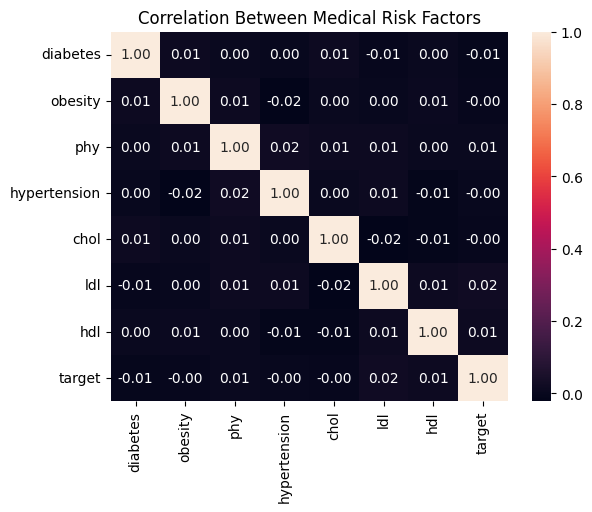

In [47]:
sn.heatmap(df[['diabetes', 'obesity', 'phy', 'hypertension', 'chol', 'ldl', 'hdl', 'target']].corr(), annot=True, fmt=".2f")
plt.title('Correlation Between Medical Risk Factors')
plt.show()

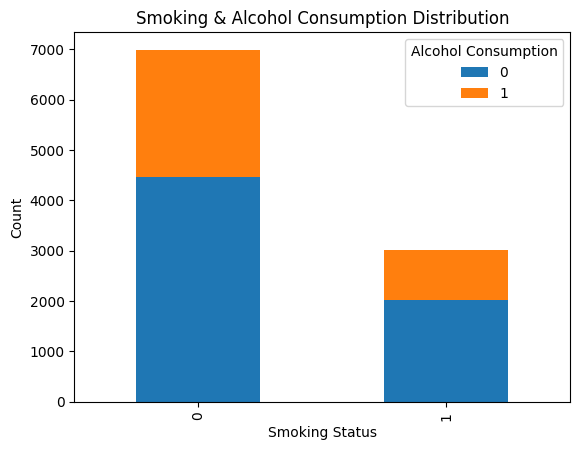

In [46]:
smoking_alcohol = df.groupby(['smoking', 'alc'])['id'].count().unstack()
smoking_alcohol.plot(kind='bar', stacked=True)
plt.title('Smoking & Alcohol Consumption Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Alcohol Consumption')
plt.show()

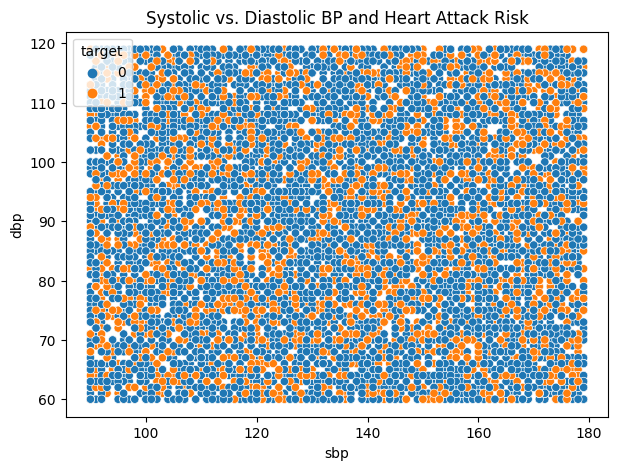

In [41]:
plt.figure(figsize=(7, 5))
sn.scatterplot(x='sbp', y='dbp', hue='target', data=df)
plt.title('Systolic vs. Diastolic BP and Heart Attack Risk')
plt.show()

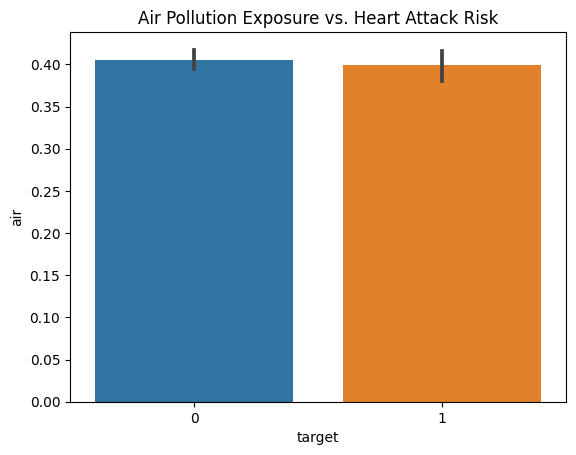

In [63]:
sn.barplot(x='target', y='air', data=df)
plt.title('Air Pollution Exposure vs. Heart Attack Risk')
plt.show()

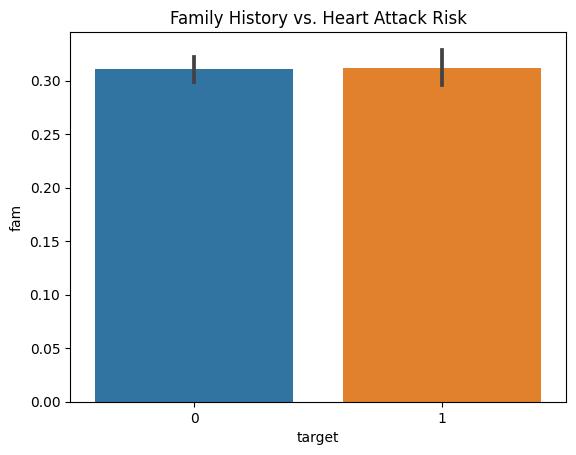

In [51]:
sn.barplot(x='target', y='fam', data=df)
plt.title('Family History vs. Heart Attack Risk')
plt.show()

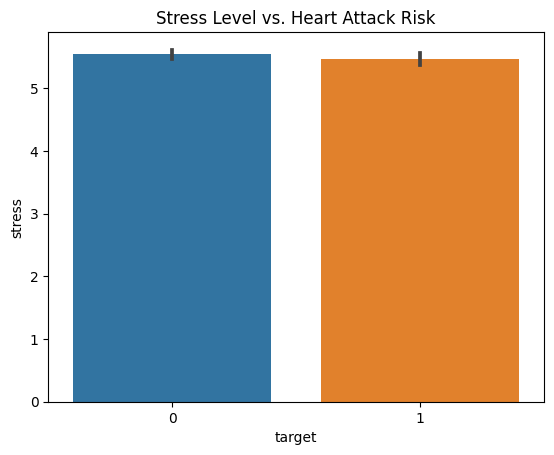

In [52]:
sn.barplot(x='target', y='stress', data=df)
plt.title('Stress Level vs. Heart Attack Risk')
plt.show()

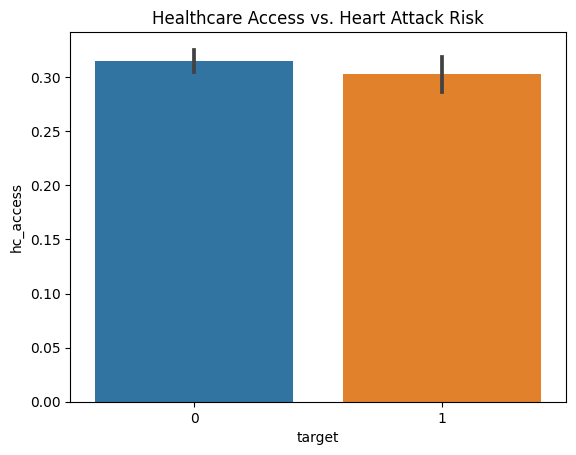

In [68]:
sn.barplot(x='target', y='hc_access', data=df)
plt.title('Healthcare Access vs. Heart Attack Risk')
plt.show()

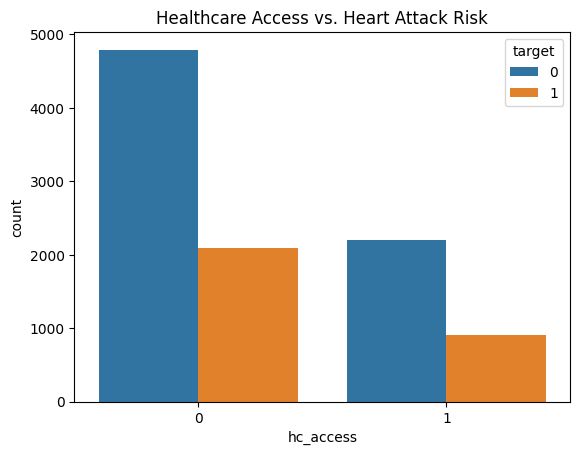

In [71]:
sn.countplot(data=df, x='hc_access', hue='target')
plt.title('Healthcare Access vs. Heart Attack Risk')
plt.show()

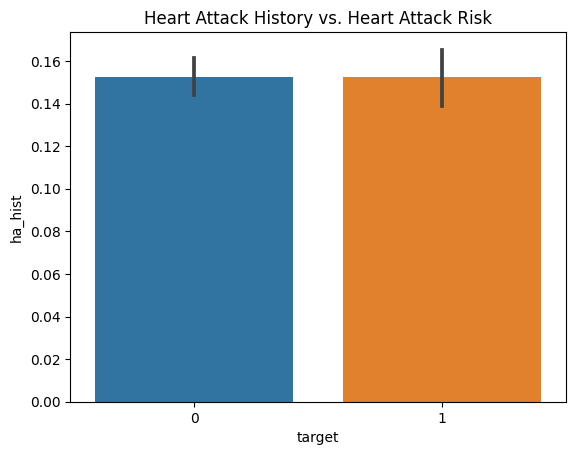

In [54]:
sn.barplot(x='target', y='ha_hist', data=df)
plt.title('Heart Attack History vs. Heart Attack Risk')
plt.show()

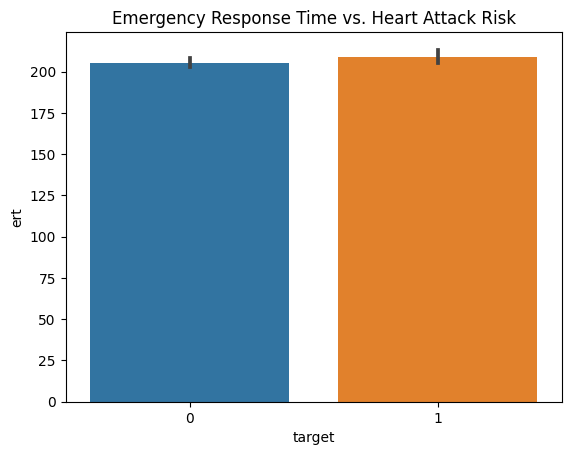

In [59]:
sn.barplot(x='target', y='ert', data=df)
plt.title('Emergency Response Time vs. Heart Attack Risk')
plt.show()

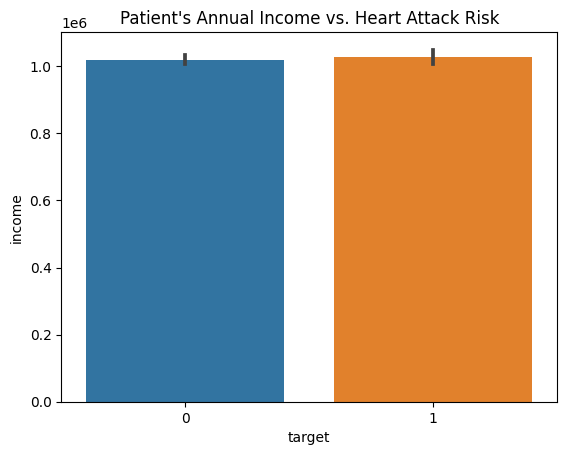

In [61]:
sn.barplot(x='target', y='income', data=df)
plt.title('Patient\'s Annual Income vs. Heart Attack Risk')
plt.show()

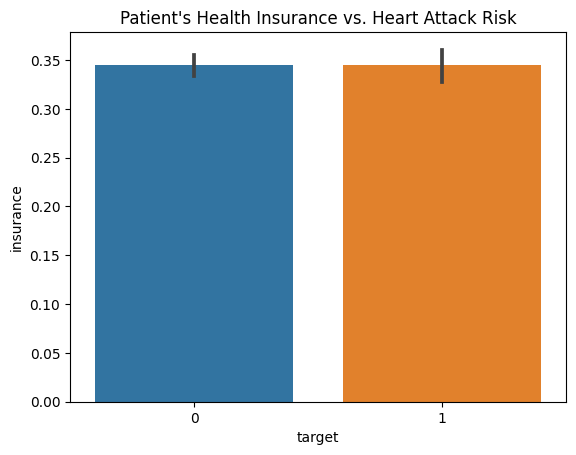

In [74]:
sn.barplot(x='target', y='insurance', data=df)
plt.title('Patient\'s Health Insurance vs. Heart Attack Risk')
plt.show()

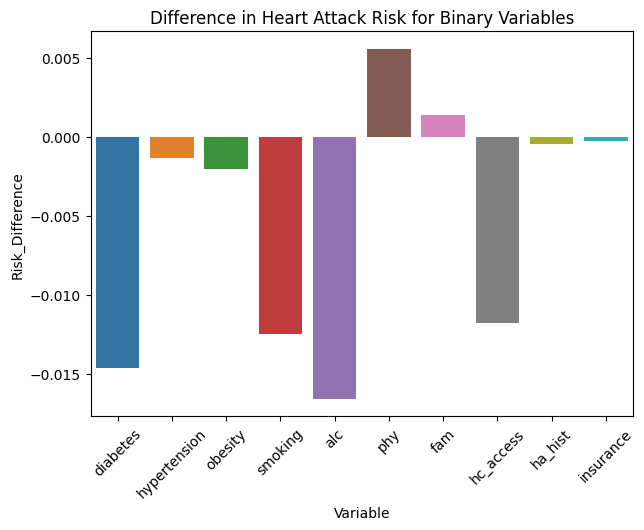

In [79]:
binary_vars = ['diabetes', 'hypertension', 'obesity', 'smoking', 'alc', 
               'phy', 'fam', 'hc_access', 
               'ha_hist', 'insurance']

risk_rates = pd.DataFrame({
    'Variable': binary_vars,
    'Risk_Rate_0': [df[df[var] == 0]['target'].mean() for var in binary_vars],
    'Risk_Rate_1': [df[df[var] == 1]['target'].mean() for var in binary_vars]
})


risk_diff = risk_rates['Risk_Rate_1'] - risk_rates['Risk_Rate_0']
risk_diff_df = pd.DataFrame({'Variable': binary_vars, 'Risk_Difference': risk_diff})


plt.figure(figsize=(7, 5))
sn.barplot(x='Variable', y='Risk_Difference', data=risk_diff_df)
plt.title('Difference in Heart Attack Risk for Binary Variables')
plt.xticks(rotation=45)
plt.show()

In [80]:
numerical_vars = ['age', 'diet', 'chol', 'tgl', 
                  'ldl', 'hdl', 'sbp', 'dbp', 
                  'air', 'stress', 'ert', 
                  'Aincome']

corr_vars = [col for col in df.columns if col not in ['id', 'state', 'gender']]
corr_matrix = df[corr_vars].corr()


corr_stack = corr_matrix.stack().reset_index()
corr_stack.columns = ['var1', 'var2', 'corr']
high_corr_pairs = corr_stack[(abs(corr_stack['corr']) > 0.5) & (corr_stack['var1'] != corr_stack['var2'])]
if high_corr_pairs.empty:
    print("There are no highly correlated pairs with corr > 0.5 in the dataset.")
else:
    print("Highly correlated pairs found:")
    print(high_corr_pairs)

There are no highly correlated pairs with corr > 0.5 in the dataset.


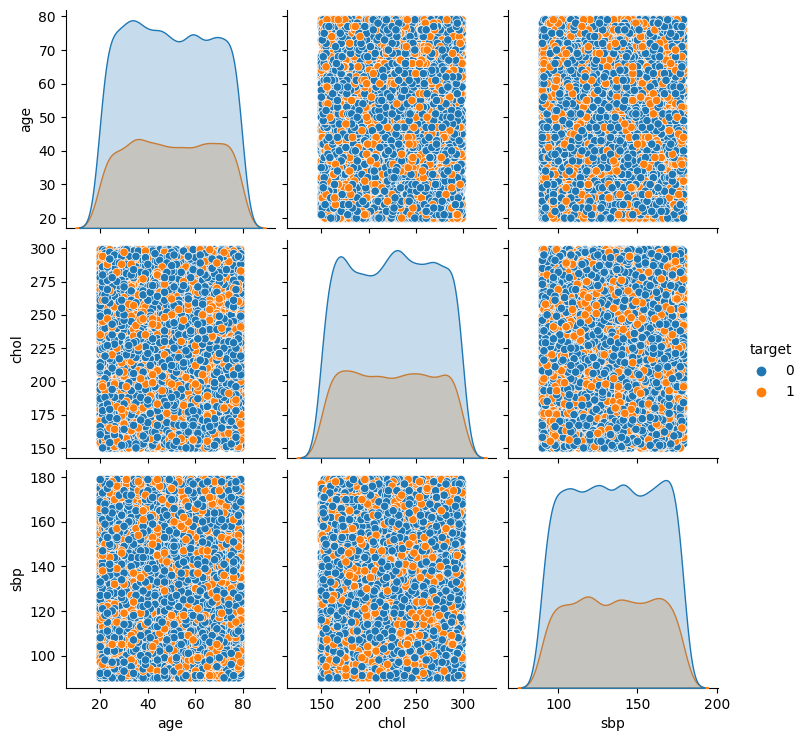

In [83]:
key_vars = ['age', 'chol', 'sbp', 'target']
sn.pairplot(df[key_vars], hue='target')
plt.show()